# Amadeus Challenge

The files can be downloaded from the follow link:


https://drive.google.com/open?id=1xUhskUGlRqpNucNCtI8wsQRMDVb0jJ4l

## Exercises:

### 1. Count the number of lines in Python for each file


To find out how many lines have each file we will use the bash command: "wc -l"

    The wc utility displays the number of lines, words, and bytes contained in each input  file.
    
     -l      The number of lines in each input file is written to the standard output.

In [1]:
nlines_bookings = ! wc -l bookings.csv.bz2
nlines_searches = ! wc -l searches.csv.bz2

In [2]:
print(nlines_bookings, nlines_searches)

[' 1825297 bookings.csv.bz2'] [' 2148325 searches.csv.bz2']


### 2. Top 10 arrival airports in the world in 2013 (using the bookings file)

Arrival airport is the column arr_port. It is the IATA code for the airport.
To get the total number of passengers for an airport, you can sum the column pax, grouping by arr_port. Note that there is negative pax. That corresponds to cancelations. So to get the total number of passengers that have actually booked, you should sum including the negatives (that will remove the canceled bookings).
Print the top 10 arrival airports in the standard output, including the number of passengers.

Bonus point: Get the name of the city or airport corresponding to that airport (programatically, we suggest to have a look at GeoBases in Github)
Bonus point: Solve this problem using pandas (instead of any other approach)


In [3]:
import pandas as pd
import numpy as np

These are the steps that we'll follow to solve this exercise:

1. Get familiar with data
2. Select the columns of interest and remove the NaN
3. Make an action plan
4. Develop the code that works with Big Data
5. Bonus Point

#### 1. Get familiar with Data

In [4]:
! bzcat ./bookings.csv.bz2 | head -2

act_date           ^source^pos_ctry^pos_iata^pos_oid  ^rloc          ^cre_date           ^duration^distance^dep_port^dep_city^dep_ctry^arr_port^arr_city^arr_ctry^lst_port^lst_city^lst_ctry^brd_port^brd_city^brd_ctry^off_port^off_city^off_ctry^mkt_port^mkt_city^mkt_ctry^intl^route          ^carrier^bkg_class^cab_class^brd_time           ^off_time           ^pax^year^month^oid      
2013-03-05 00:00:00^1A    ^DE      ^a68dd7ae953c8acfb187a1af2dcbe123^1a11ae49fcbf545fd2afc1a24d88d2b7^ea65900e72d71f4626378e2ebd298267^2013-02-22 00:00:00^1708^0^ZRH     ^ZRH     ^CH      ^LHR     ^LON     ^GB      ^ZRH     ^ZRH     ^CH      ^LHR     ^LON     ^GB      ^ZRH     ^ZRH     ^CH      ^LHRZRH  ^LONZRH  ^CHGB    ^1^LHRZRH         ^VI^T        ^Y        ^2013-03-07 08:50:00^2013-03-07 11:33:37^-1^2013^3^NULL     

bzcat: I/O or other error, bailing out.  Possible reason follows.
bzcat: Broken pipe
	Input file = ./bookings.sample.csv.bz2, output file = (stdout)


Here we can see that we have "^" as a delimiter.

As we know that our file is too large, we will work with 1.000 lines for the moment.

In [5]:
bookings = pd.read_csv('bookings.csv.bz2',sep='^', nrows=10000)
pd.set_option('display.max_columns', None) # To display all the columns
bookings.sample(5)

,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,dep_city,dep_ctry,arr_port,arr_city,arr_ctry,lst_port,lst_city,lst_ctry,brd_port,brd_city,brd_ctry,off_port,off_city,off_ctry,mkt_port,mkt_city,mkt_ctry,intl,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
1766,2013-03-07 00:00:00,1V,US,b10e64ad572b74d2159ff1f4c0310f58,a4d9ef3912d7c53c452ad7eff1fdb239,5d5ad6d384c2e8ede856774b11766e29,2013-03-07 00:00:00,1625,0,MCO,ORL,US,PIT,PIT,US,MCO,ORL,US,PIT,PIT,US,MCO,ORL,US,MCOPIT,ORLPIT,USUS,0,PITMCO,PV,L,Y,2013-03-20 17:23:00,2013-03-20 19:45:52,1,2013,3,NULL
8466,2013-03-01 00:00:00,1V,US,72d0a3c7b1b17bf0f74f515ae70c232b,d30d41f75ac741dda13be7c822401fbf,e21e817b530fd7315b0276456e175bad,2013-03-01 00:00:00,4710,0,MSP,MSP,US,IAH,HOU,US,MSP,MSP,US,MSP,MSP,US,IAH,HOU,US,IAHMSP,HOUMSP,USUS,0,MSPIAH,FK,Q,Y,2013-03-19 16:04:00,2013-03-19 18:49:35,1,2013,3,NULL
1017,2013-03-14 00:00:00,1P,JP,5c5a81dde7dbb775007c44b5e6fbe8d0,00649d2030ad2872fcbd2c8aadc496d2,d9807af16260ee4d298b8898ddb39ae4,2013-02-26 00:00:00,6330,0,KIX,OSA,JP,GUM,GUM,GU,KIX,OSA,JP,GUM,GUM,GU,KIX,OSA,JP,GUMKIX,GUMOSA,GUJP,1,GUMKIX,NV,K,Y,2013-07-29 16:50:00,2013-07-29 19:35:45,-6,2013,3,NULL
4295,2013-03-04 00:00:00,1A,NZ,c100916078f3f1e0c541b7c78941fdba,2b3014c9c671f94fe90e68b6a1366edd,eeb4ccbffe65f5453be5776b86231c1b,2013-02-24 00:00:00,23791,0,AKL,AKL,NZ,DPS,DPS,ID,AKL,AKL,NZ,DPS,DPS,ID,AKL,AKL,NZ,AKLDPS,AKLDPS,IDNZ,1,DPSKULAKL,WR,Y,Y,2013-05-04 16:05:00,2013-05-05 12:46:58,-2,2013,3,PMRHF3102
9144,2013-03-22 00:00:00,1P,US,738d56754e3975dbe2f446bc07adeb82,77b824be95c0e44b27dd1dd8e22a7503,17bdabcbea41cbc277b0375f359f7d6d,2013-03-20 00:00:00,19037,0,MKE,MKE,US,JFK,NYC,US,MKE,MKE,US,MKE,MKE,US,JFK,NYC,US,JFKMKE,MKENYC,USUS,0,MKEJFK,NV,V,Y,2013-04-10 12:05:00,2013-04-10 15:17:24,-1,2013,3,NULL


#### 2. Select the columns of interest and remove the Nan

As mentioned we are going to need the arrival airport, passenger and year columns.

In [6]:
bookings.columns

Index(['act_date           ', 'source', 'pos_ctry', 'pos_iata', 'pos_oid  ',
       'rloc          ', 'cre_date           ', 'duration', 'distance',
       'dep_port', 'dep_city', 'dep_ctry', 'arr_port', 'arr_city', 'arr_ctry',
       'lst_port', 'lst_city', 'lst_ctry', 'brd_port', 'brd_city', 'brd_ctry',
       'off_port', 'off_city', 'off_ctry', 'mkt_port', 'mkt_city', 'mkt_ctry',
       'intl', 'route          ', 'carrier', 'bkg_class', 'cab_class',
       'brd_time           ', 'off_time           ', 'pax', 'year', 'month',
       'oid      '],
      dtype='object')

In [7]:
bookings = pd.read_csv('bookings.csv.bz2', sep='^', usecols=['arr_port','pax', 'year'],
                       nrows=10000)
bookings =bookings.dropna()
bookings.sample(5)

,arr_port,pax,year
9517,TFS,2,2013
8789,PLS,1,2013
5424,GUA,1,2013
6766,MSY,1,2013
7249,YYC,2,2013


#### 3. Make an action plan

1. Filter the year 2013 
2. Group by airport
3. Sum the passengers
4. Sort by passengers with ascending = False option
5. Select the Top 10

In [8]:
# Filtering the year 2013 and returning only the 'arr_port' and'pax' columns.
bookings=bookings[bookings['year']==2013 ][['arr_port','pax']]
# Grouping by airports and summing the passengers to take out the cancelations.
# Sorting by passengers and by descending order. 
bookings=bookings.groupby('arr_port').sum().sort_values('pax',ascending=False)
#Getting the top 10 arrival airports.
bookings.head(10)

,pax
arr_port,
HKG,112
LGA,95
ORD,94
JFK,92
LAX,91
SFO,91
MCO,90
DCA,82
DEN,79


#### 4. Develop the code that works with Big Data

For that we are going to work with chunks.

In [9]:
%%time
# 1. First we define the chunsize.
bookings_chunks = pd.read_csv('bookings.csv.bz2',sep='^',
                              usecols=['arr_port','pax', 'year'], chunksize=1000000)
#2. Put all the chunks together in a variable called all_chunks
"""For every interation we filter by year, group by arrival airport and sum the passengers
to take of the cancelations."""
all_chunks=pd.DataFrame()
for i, b_chunk in enumerate(bookings_chunks):
    print(i)
    bookings=b_chunk.dropna()
    bookings=bookings[bookings['year']==2013 ][['arr_port', 'pax']].groupby('arr_port').sum()
    all_chunks=all_chunks.append(bookings)
# 3. Last step we reset the index and again filter the values but this time sorting.
all_chunks=all_chunks.reset_index().groupby('arr_port').sum().sort_values('pax',ascending=False)
all_chunks.head(10)

0
1
2
3
4
5
6
7
8
9
10
CPU times: user 3min 28s, sys: 2.8 s, total: 3min 30s
Wall time: 3min 35s


,pax
arr_port,
LHR,88809.0
MCO,70930.0
LAX,70530.0
LAS,69630.0
JFK,66270.0
CDG,64490.0
BKK,59460.0
MIA,58150.0
SFO,58000.0


#### 5. Bonus Point

In [10]:
%pip install neobase
import neobase as nb
from neobase import NeoBase

Note: you may need to restart the kernel to use updated packages.


In [11]:
geoDict=NeoBase()
# The function "get" return as a dictionary type the information of the IATA given.
geoDict.get('LHR')
# In this case we are going to need the "name" information.

{'__dup__': set(),
 'iata_code': 'LHR',
 'name': 'London Heathrow Airport',
 'lat': '51.4775',
 'lng': '-0.461389',
 'page_rank': 0.44517643489228376,
 'country_code': 'GB',
 'country_name': 'United Kingdom',
 'continent_name': 'Europe',
 'timezone': 'Europe/London',
 'city_code_list': ['LON'],
 'city_name_list': ['London'],
 'location_type': ['A'],
 'currency': 'GBP'}

In [12]:
geoDict.get('LHR', 'name')

'London Heathrow Airport'

At this point we need to remove the white spaces from the arr_port column.

In [13]:
all_chunks = all_chunks.reset_index().head()


In [14]:
all_chunks.arr_port[0]

'LHR     '

In [15]:
all_chunks['arr_port']=all_chunks['arr_port'].str.strip()

Now we test to see if everything works fine.

In [16]:
geoDict.get(all_chunks.arr_port[0],'name')

'London Heathrow Airport'

Using a "map" function we'll create a new columns with the airport name.

In [17]:
all_chunks['AirportName']=all_chunks['arr_port'].map(lambda x: geoDict.get(x,'name'))

In [18]:
all_chunks.head()

,arr_port,pax,AirportName
0,LHR,88809.0,London Heathrow Airport
1,MCO,70930.0,Orlando International Airport
2,LAX,70530.0,Los Angeles International Airport
3,LAS,69630.0,McCarran International Airport
4,JFK,66270.0,John F. Kennedy International Airport


### Final Solution

In [21]:
%%time
import pandas as pd
from neobase import NeoBase
geoDict=NeoBase()

# 1. First we define the chunsize.
bookings_chunks = pd.read_csv('bookings.csv.bz2', sep='^',
                              usecols = ['arr_port','pax', 'year'],
                              chunksize = 1000000)

#2. Put all the chunks together in a variable called all_chunks
"""For every interation we filter by year, group by arrival airport and sum the passengers
to take of the cancelations."""
all_chunks = pd.DataFrame()

for i, b_chunk in enumerate(bookings_chunks):
    print(i) # To see the running process
    bookings = b_chunk.dropna()
    bookings=bookings[bookings['year']==2013 ][['arr_port', 'pax']].groupby('arr_port').sum()
    all_chunks=all_chunks.append(bookings)

    
# 3. Last step we reset the index and again filter the values but this time sorting.    
all_chunks=all_chunks.reset_index().groupby('arr_port').sum().sort_values('pax',ascending=False).reset_index()
all_chunks['arr_port']=all_chunks['arr_port'].str.strip()
# 4. After running the code we discover that has one IATA code wrong ('CPQ'). Need to remove.
all_chunks=all_chunks[all_chunks['arr_port'] != 'CPQ']
all_chunks['AirportName']=all_chunks['arr_port'].map(lambda x: geoDict.get(x,'name'))
all_chunks=all_chunks.astype({'pax':int})
print(all_chunks.head(10))

#Saving the file
all_chunks.to_csv('top_airports.csv', sep='^', index=False)
!head ./top_airports.csv

0
1
2
3
4
5
6
7
8
9
10
  arr_port    pax                            AirportName
0      LHR  88809                London Heathrow Airport
1      MCO  70930          Orlando International Airport
2      LAX  70530      Los Angeles International Airport
3      LAS  69630         McCarran International Airport
4      JFK  66270  John F. Kennedy International Airport
5      CDG  64490        Paris Charles de Gaulle Airport
6      BKK  59460                   Suvarnabhumi Airport
7      MIA  58150            Miami International Airport
8      SFO  58000    San Francisco International Airport
9      DXB  55590            Dubai International Airport
arr_port^pax^AirportName
LHR^88809^London Heathrow Airport
MCO^70930^Orlando International Airport
LAX^70530^Los Angeles International Airport
LAS^69630^McCarran International Airport
JFK^66270^John F. Kennedy International Airport
CDG^64490^Paris Charles de Gaulle Airport
BKK^59460^Suvarnabhumi Airport
MIA^58150^Miami International Airport
SFO^580

### 3. Plot the monthly number of searches for flights arriving at Málaga, Madrid or Barcelona

For the arriving airport, you can use the Destination column in the searches file. 
Plot a curve for Málaga, another one for Madrid, and another one for Barcelona, in the same figure.

Bonus point: Solving this problem using pandas (instead of any other approach)


These are the steps that we'll follow to solve this exercise:

1. Get familiar with data
2. Select the columns of interest
3. Cleaning the Data
4. Make action plan
5. Adjust the code to work with Big data

### 1. Get Familiar with the Data

In [46]:
! bzcat ./searches.csv.bz2 | head -2

Date^Time^TxnCode^OfficeID^Country^Origin^Destination^RoundTrip^NbSegments^Seg1Departure^Seg1Arrival^Seg1Date^Seg1Carrier^Seg1BookingCode^Seg2Departure^Seg2Arrival^Seg2Date^Seg2Carrier^Seg2BookingCode^Seg3Departure^Seg3Arrival^Seg3Date^Seg3Carrier^Seg3BookingCode^Seg4Departure^Seg4Arrival^Seg4Date^Seg4Carrier^Seg4BookingCode^Seg5Departure^Seg5Arrival^Seg5Date^Seg5Carrier^Seg5BookingCode^Seg6Departure^Seg6Arrival^Seg6Date^Seg6Carrier^Seg6BookingCode^From^IsPublishedForNeg^IsFromInternet^IsFromVista^TerminalID^InternetOffice
2013-01-01^20:25:57^MPT^624d8c3ac0b3a7ca03e3c167e0f48327^DE^TXL^AUH^1^2^TXL^AUH^2013-01-26^D2^^AUH^TXL^2013-02-02^D2^^^^^^^^^^^^^^^^^^^^^^1ASIWS^0^0^0^d41d8cd98f00b204e9800998ecf8427e^FRA

bzcat: I/O or other error, bailing out.  Possible reason follows.
bzcat: Broken pipe
	Input file = ./searches.csv.bz2, output file = (stdout)


Also we have "^" as a delimiter.

In [47]:
searches = pd.read_csv('searches.csv.bz2', sep='^', nrows=100000)
print(searches.info())
searches.sample(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 45 columns):
Date                 10000 non-null object
Time                 10000 non-null object
TxnCode              10000 non-null object
OfficeID             10000 non-null object
Country              10000 non-null object
Origin               10000 non-null object
Destination          10000 non-null object
RoundTrip            10000 non-null int64
NbSegments           10000 non-null int64
Seg1Departure        10000 non-null object
Seg1Arrival          10000 non-null object
Seg1Date             9973 non-null object
Seg1Carrier          4047 non-null object
Seg1BookingCode      1143 non-null object
Seg2Departure        7196 non-null object
Seg2Arrival          7196 non-null object
Seg2Date             7161 non-null object
Seg2Carrier          2870 non-null object
Seg2BookingCode      998 non-null object
Seg3Departure        534 non-null object
Seg3Arrival          534 non-null object
Seg3

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
802,2013-01-01,22:50:20,MPT,a615de182aabef079774a1cc842a3265,GB,LON,UIO,0,1,LON,UIO,2013-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,LON
5849,2013-01-06,19:22:13,MPT,f0df4b564514839fbfe2ac71b8c6f12e,CA,YYC,DAR,1,2,YYC,DAR,2013-04-22,NaN,NaN,DAR,YYC,2013-05-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,YVR
4667,2013-01-05,14:41:16,MPT,440642a9bdaeb6287f826cefd73255e8,US,NYC,BKI,1,2,NYC,BKI,2013-03-29,FK,NaN,BKI,NYC,2013-04-07,FK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,HPN
5522,2013-01-06,11:57:26,MTP,676ba5b6a22af8f99024015d94a6bb88,GB,MCT,BCN,1,2,MCT,BCN,2013-04-24,NaN,NaN,BCN,MCT,2013-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,LON
4609,2013-01-05,22:30:46,FFP,f127c92cdab5a4eeb21dc606aaed24f6,ES,STR,SAN,1,2,STR,SAN,2013-02-24,7V,NaN,SAN,STR,2013-05-19,7V,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,PMI


### 2. Select the columns

In [48]:
searches.columns

Index(['Date', 'Time', 'TxnCode', 'OfficeID', 'Country', 'Origin',
       'Destination', 'RoundTrip', 'NbSegments', 'Seg1Departure',
       'Seg1Arrival', 'Seg1Date', 'Seg1Carrier', 'Seg1BookingCode',
       'Seg2Departure', 'Seg2Arrival', 'Seg2Date', 'Seg2Carrier',
       'Seg2BookingCode', 'Seg3Departure', 'Seg3Arrival', 'Seg3Date',
       'Seg3Carrier', 'Seg3BookingCode', 'Seg4Departure', 'Seg4Arrival',
       'Seg4Date', 'Seg4Carrier', 'Seg4BookingCode', 'Seg5Departure',
       'Seg5Arrival', 'Seg5Date', 'Seg5Carrier', 'Seg5BookingCode',
       'Seg6Departure', 'Seg6Arrival', 'Seg6Date', 'Seg6Carrier',
       'Seg6BookingCode', 'From', 'IsPublishedForNeg', 'IsFromInternet',
       'IsFromVista', 'TerminalID', 'InternetOffice'],
      dtype='object')

In [62]:
searches = pd.read_csv('searches.csv.bz2', sep='^', usecols = ['Date', 'Destination'],
                       nrows = 100000)
print(searches.info())
searches.sample(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
Date           100000 non-null object
Destination    100000 non-null object
dtypes: object(2)
memory usage: 1.5+ MB
None


,Date,Destination
93652,2013-04-04,BOS
54815,2013-02-24,BWK
39240,2013-02-09,GNB
25823,2013-01-26,SJO
39129,2013-02-09,LPA


### 3. Clean the Data

In [63]:
searches = searches.dropna()

### 4. Make an action plan

1. Filter the 3 airports (Malaga, Madrid, Barcelona)
2. Format the Date
3. Group by month and destiny
4. Plot

#### 1. Filter the 3 airports

In [64]:
searches = searches[searches.Destination.isin(['MAD', 'BCN', 'AGP'])]

#### 2. Fomat the Date

In [65]:
searches['Plot_Date'] = searches.Date.str[0:7]
searches.head()

,Date,Destination,Plot_Date
4,2013-01-01,MAD,2013-01
93,2013-01-01,AGP,2013-01
113,2013-01-01,BCN,2013-01
147,2013-01-01,AGP,2013-01
151,2013-01-01,MAD,2013-01


#### 3. Group by month and destiny and count

In [70]:
searches_grouped = searches.groupby(['Plot_Date', 'Destination']).count()
searches_grouped = searches_grouped.reset_index()
searches_grouped.head()

,Plot_Date,Destination,Date
0,2013-01,AGP,169
1,2013-01,BCN,517
2,2013-01,MAD,425
3,2013-02,AGP,147
4,2013-02,BCN,497


#### 4. Plot

In [72]:
searches_to_plot = searches_grouped.pivot('Plot_Date', 'Destination', 'Date')

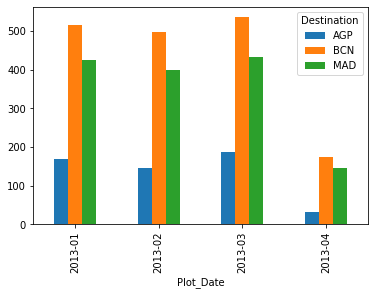

In [77]:
plot = searches_to_plot.plot(kind='bar')
plot;

### 5. Adjust the code to work with Big data

#### Final Solution

0
1
2
3
4
5
6
7
8
9
10


<Figure size 432x288 with 0 Axes>

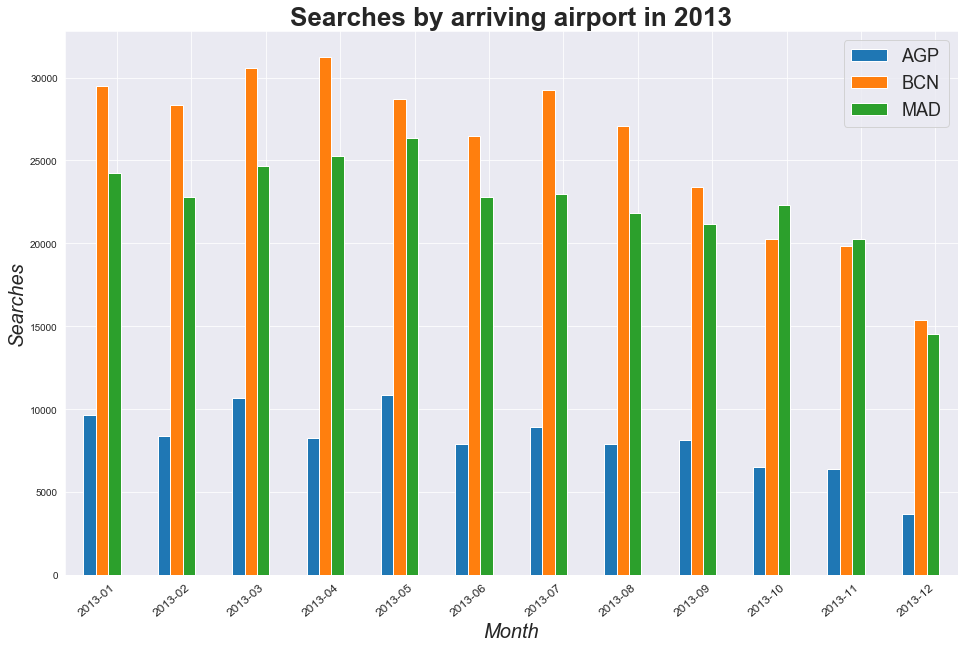

CPU times: user 3min 32s, sys: 2.73 s, total: 3min 35s
Wall time: 3min 34s


In [86]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Reading the file
searches_df = pd.read_csv('searches.csv.bz2', sep='^', usecols=['Date', 'Destination'],
               chunksize=2000000)

# Working with chuncks
all_chunks = pd.DataFrame()

for i, chunk in enumerate(searches_df):
    print (i)
    searches = chunk.dropna()
    # Filtering Madrid, Barcelona and Malaga airports
    searches = searches[searches.Destination.isin(['MAD', 'BCN', 'AGP'])]
    # Formating the dates
    searches['Plot_Date'] = searches.Date.str[0:7]
    # Grouping by destination and month
    searches_grouped = searches.groupby(['Plot_Date', 'Destination']).count()
    searches_grouped = searches_grouped.reset_index()
    # Grouping all the chunks
    all_chunks = all_chunks.append(searches_grouped)

    
all_chunks_grouped = all_chunks.groupby(['Plot_Date', 'Destination']).sum().reset_index()
# Data ready to plot
to_plot = all_chunks_grouped.pivot('Plot_Date', 'Destination', 'Date')

# Seting up the plot: 
sns.set_style("darkgrid")

plt.tight_layout()
to_plot.plot(kind='bar', figsize=[16, 10]) # Barplot type
plt.legend(loc='best', prop={'size':18})
plt.xlabel("Month", fontsize=20, fontstyle='oblique')
plt.ylabel("Searches", fontsize=20, fontstyle='oblique')
plt.xticks(np.arange(12)+0.2, to_plot.index, rotation=40, fontsize=12, ha='right')
plt.title('Searches by arriving airport in 2013', fontsize=26, fontweight='bold')

plt.show();

### 4. Match searches with bookings

For every search in the searches file, find out whether the search ended up in a booking or not (using the info in the bookings file). For instance, search and booking origin and destination should match. 
For the bookings file, origin and destination are the columns dep_port and arr_port, respectively. 
Generate a CSV file with the search data, and an additional field, containing 1 if the search ended up in a booking, and 0 otherwise.


1. Get familiar with data
2. Make action plan
3. Adjust the code to work with Big data

### 1. Get Familiar with the Data

In [87]:
! bzcat ./searches.csv.bz2 | head -2

Date^Time^TxnCode^OfficeID^Country^Origin^Destination^RoundTrip^NbSegments^Seg1Departure^Seg1Arrival^Seg1Date^Seg1Carrier^Seg1BookingCode^Seg2Departure^Seg2Arrival^Seg2Date^Seg2Carrier^Seg2BookingCode^Seg3Departure^Seg3Arrival^Seg3Date^Seg3Carrier^Seg3BookingCode^Seg4Departure^Seg4Arrival^Seg4Date^Seg4Carrier^Seg4BookingCode^Seg5Departure^Seg5Arrival^Seg5Date^Seg5Carrier^Seg5BookingCode^Seg6Departure^Seg6Arrival^Seg6Date^Seg6Carrier^Seg6BookingCode^From^IsPublishedForNeg^IsFromInternet^IsFromVista^TerminalID^InternetOffice
2013-01-01^20:25:57^MPT^624d8c3ac0b3a7ca03e3c167e0f48327^DE^TXL^AUH^1^2^TXL^AUH^2013-01-26^D2^^AUH^TXL^2013-02-02^D2^^^^^^^^^^^^^^^^^^^^^^1ASIWS^0^0^0^d41d8cd98f00b204e9800998ecf8427e^FRA

bzcat: I/O or other error, bailing out.  Possible reason follows.
bzcat: Broken pipe
	Input file = ./searches.csv.bz2, output file = (stdout)


In [88]:
! bzcat ./bookings.csv.bz2 | head -2

act_date           ^source^pos_ctry^pos_iata^pos_oid  ^rloc          ^cre_date           ^duration^distance^dep_port^dep_city^dep_ctry^arr_port^arr_city^arr_ctry^lst_port^lst_city^lst_ctry^brd_port^brd_city^brd_ctry^off_port^off_city^off_ctry^mkt_port^mkt_city^mkt_ctry^intl^route          ^carrier^bkg_class^cab_class^brd_time           ^off_time           ^pax^year^month^oid      
2013-03-05 00:00:00^1A    ^DE      ^a68dd7ae953c8acfb187a1af2dcbe123^1a11ae49fcbf545fd2afc1a24d88d2b7^ea65900e72d71f4626378e2ebd298267^2013-02-22 00:00:00^1708^0^ZRH     ^ZRH     ^CH      ^LHR     ^LON     ^GB      ^ZRH     ^ZRH     ^CH      ^LHR     ^LON     ^GB      ^ZRH     ^ZRH     ^CH      ^LHRZRH  ^LONZRH  ^CHGB    ^1^LHRZRH         ^VI^T        ^Y        ^2013-03-07 08:50:00^2013-03-07 11:33:37^-1^2013^3^NULL     

bzcat: I/O or other error, bailing out.  Possible reason follows.
bzcat: Broken pipe
	Input file = ./bookings.csv.bz2, output file = (stdout)


### 2. Action plan

1. Remove duplicates from both files and read 3 columns from Bookings and all from Search
2. Remove white spaces from bookings and format the date in Bookings
3. Create column "booked" with 1 in Bookings table and remove duplicates.
4. Merge on 3 columns
5. Fill "booked" of merged table with 0

### Prepare the Data for processing

#### 1. Check for duplicated data

#### Booking

Read only the cre_date, dep_port, arr_port columns

In [90]:
%%time
booking_df = pd.read_csv('./bookings.csv.bz2', sep="^", chunksize=1000000, 
                         usecols=['cre_date           ','dep_port', 'arr_port'],
                         low_memory=False, dtype=str)

# Working with chuncks and dropping the duplicates
all_chunks_bookings = pd.DataFrame()

for i, chunk in enumerate(booking_df):
    all_chunks_bookings = all_chunks_bookings.append(chunk)
    all_chunks_bookings.drop_duplicates(inplace=True)
    print((i+1)*1000000, len(all_chunks))

1000000 1000003
2000000 1000003
3000000 1000003
4000000 1000003
5000000 1000003
6000000 1000003
7000000 1000003
8000000 1000003
9000000 1000003
10000000 1000003
11000000 1000003
CPU times: user 3min 29s, sys: 6.79 s, total: 3min 36s
Wall time: 3min 35s


#### Searches

Read all columns

In [91]:
%%time
searches_df = pd.read_csv('./searches.csv.bz2', sep="^", chunksize=1000000,
                         low_memory=False, dtype=str)

# Working with chuncks and dropping the duplicates
all_chunks_searches = pd.DataFrame()

for i, chunk in enumerate(searches_df):
    all_chunks_searches = all_chunks_searches.append(chunk)
    all_chunks_searches.drop_duplicates(inplace=True)
    print((i+1)*1000000, len(all_chunks_searches))

1000000 358999
2000000 359003
3000000 359003
4000000 359003
5000000 359003
6000000 359003
7000000 359003
8000000 359003
9000000 359003
10000000 359003
11000000 359003
12000000 359003
13000000 359003
14000000 359003
15000000 359003
16000000 359003
17000000 359003
18000000 359003
19000000 359003
20000000 359003
21000000 359004
CPU times: user 8min 12s, sys: 33.1 s, total: 8min 45s
Wall time: 8min 28s


#### 2. Remove white spaces from bookings and format the date in Bookings

In [93]:
all_chunks_bookings.columns

Index(['cre_date           ', 'dep_port', 'arr_port'], dtype='object')

In [99]:
all_chunks_bookings.columns = all_chunks_bookings.columns.str.strip()
all_chunks_bookings.dep_port = all_chunks_bookings.dep_port.str.strip()
all_chunks_bookings.arr_port = all_chunks_bookings.arr_port.str.strip()
all_chunks_bookings.cre_date = all_chunks_bookings.cre_date.str[0:10]

,cre_date,dep_port,arr_port,booked
0,2013-02-22,ZRH,LHR,1
1,2013-03-26,SAL,CLT,1
3,2013-03-26,AKL,SVO,1
5,2013-03-20,DEN,LGA,1
7,2013-03-25,NRT,SIN,1


#### 3. Create column "booked" with 1 in Bookings table and remove duplicates.

In [ ]:
all_chunks_bookings['booked'] = 1
all_chunks_bookings.drop_duplicates(inplace=True)
all_chunks_bookings.head()

#### 4. Merge on 3 columns

In [100]:
merged = all_chunks_searches.merge(all_chunks_bookings,
           how='left',
           left_on=['Date', 'Origin', 'Destination'],
           right_on=['cre_date', 'dep_port', 'arr_port'])

In [101]:
# Dropping non usefull collumns
merged.drop(['cre_date', 'dep_port', 'arr_port'], axis=1, inplace=True)

In [102]:
# Check if the data is correct
merged[merged['booked']>0 ].head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice,booked
27,2013-01-01,18:33:28,CCP,3565e31495ecfd46fa018339d20382b1,SA,RUH,JED,0,1,RUH,JED,2013-01-04,KP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,JED,1.0
40,2013-01-01,06:36:57,FFP,86f167b84e77346849f9439ae87c02a6,SA,DMM,MNL,1,2,DMM,MNL,2013-06-01,OJ,NaN,MNL,DMM,2013-06-30,OJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,JED,1.0
59,2013-01-01,07:00:38,FQD,e8741eaf2fa2f71f931475d18fa72096,US,ATL,MIA,0,1,ATL,MIA,2013-01-10,NV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,SEA,1.0
134,2013-01-01,23:30:44,MPT,5215502d9524c3183f3839b0d9a5e4f9,AU,MEL,SYD,0,1,MEL,SYD,2013-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,SYD,1.0
172,2013-01-01,18:34:27,MPT,fd4afff0035bec8f8e305d38804c33f6,IN,BOM,JED,1,2,BOM,JED,2013-01-26,NaN,NaN,JED,BOM,2013-01-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,DEL,1.0


#### 5. Fill "booked" of merged table with 0

In [103]:
merged['booked'] = merged['booked'].fillna(0)

In [104]:
# Change the float type to integer
merged = merged.astype({"booked":int})

### 3. Adjust the code to work with Big data

#### Final Solution

In [105]:
%%time

# Reading the Booking file with chuncks and preparing the data without duplicates
booking_df = pd.read_csv('./bookings.csv.bz2', sep="^", chunksize=1000000, 
                         usecols=['cre_date           ','dep_port', 'arr_port'],
                         low_memory=False, dtype=str)

all_chunks_bookings = pd.DataFrame()
for i, chunk in enumerate(booking_df):
    all_chunks_bookings = all_chunks_bookings.append(chunk)
    all_chunks_bookings.drop_duplicates(inplace=True)
    print((i+1)*1000000, len(all_chunks_bookings))

# Reading the Searches file with chuncks and preparing the data without duplicates    
searches_df = pd.read_csv('./searches.csv.bz2', sep="^", chunksize=1000000,
                         low_memory=False, dtype=str)

all_chunks_searches = pd.DataFrame()
for i, chunk in enumerate(searches_df):
    all_chunks_searches = all_chunks_searches.append(chunk)
    all_chunks_searches.drop_duplicates(inplace=True)
    print((i+1)*1000000, len(all_chunks_searches))
    
    
# Taking out the whitespaces from the columns
all_chunks_bookings.columns = all_chunks_bookings.columns.str.strip()
all_chunks_bookings.dep_port = all_chunks_bookings.dep_port.str.strip()
all_chunks_bookings.arr_port = all_chunks_bookings.arr_port.str.strip()
all_chunks_bookings.cre_date = all_chunks_bookings.cre_date.str[0:10]
all_chunks_bookings.drop_duplicates(inplace=True)
# Creating a new column "booked" with value 1.
all_chunks_bookings['booked'] = 1
# Dropping duplicates
all_chunks_bookings.drop_duplicates(inplace=True)

# Merging files
merged = all_chunks_searches.merge(all_chunks_bookings,
           how='left',
           left_on=['Date', 'Origin', 'Destination'],
           right_on=['cre_date', 'dep_port', 'arr_port'])

# Dropping the "'cre_date', 'dep_port', 'arr_port'" columns.
merged.drop(['cre_date', 'dep_port', 'arr_port'], axis=1, inplace=True)

# Replacing NaN with 0
merged['booked'] = merged['booked'].fillna(0)

# Changing the booked type vale to interger.
merged = merged.astype({"booked":int})

# Creating a CSV file. 
merged.to_csv("searches_with_book.csv", sep='^', index=False)

1000000 1000003
2000000 1000003
3000000 1000003
4000000 1000003
5000000 1000003
6000000 1000003
7000000 1000003
8000000 1000003
9000000 1000003
10000000 1000003
11000000 1000003
1000000 358999
2000000 359003
3000000 359003
4000000 359003
5000000 359003
6000000 359003
7000000 359003
8000000 359003
9000000 359003
10000000 359003
11000000 359003
12000000 359003
13000000 359003
14000000 359003
15000000 359003
16000000 359003
17000000 359003
18000000 359003
19000000 359003
20000000 359003
21000000 359004
CPU times: user 11min 56s, sys: 42.8 s, total: 12min 39s
Wall time: 12min 21s


### 5. Write a Web Service

Wrap the output of the second exercise in a web service that returns the data in JSON format (instead of printing to the standard output).
The web service should accept a parameter n>0. For the top 10 airports, n is 10. For the X top airports, n is X 


In [106]:
!pip install flask

In [121]:
from flask import Flask
import json
import pandas as pd

In [122]:
# Read the generated file of the exercise number 2 
top_airports = pd.read_csv('./top_airports.csv', sep="^")

In [126]:
app = Flask("Web service") # create an app instance

@app.route('/get_top/<n>', methods=['GET']) # at the end point /get_top/<n>

# Function
def get_number(n):
    try:
        numb=int(n)
        top_n=top_airports.head(numb)
        return top_n.to_json()
    except:
        return "This was not a number"
    


In [127]:
app.run() # run the flask app

 * Serving Flask app "Web service" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [30/Dec/2019 18:45:56] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [30/Dec/2019 18:46:05] "GET /get_top/10 HTTP/1.1" 200 -
127.0.0.1 - - [30/Dec/2019 18:46:10] "GET /get_top/100 HTTP/1.1" 200 -
127.0.0.1 - - [30/Dec/2019 18:47:09] "GET /get_top/10 HTTP/1.1" 200 -
127.0.0.1 - - [30/Dec/2019 18:47:21] "GET /get_top/100 HTTP/1.1" 200 -
127.0.0.1 - - [30/Dec/2019 18:47:32] "GET /get_top/10 HTTP/1.1" 200 -
